In [1]:
import sympy
sympy.init_printing()

(u_max, u_star, rho_max,
 rho_star, A, B) = sympy.symbols('u_max u_star rho_max rho_star A B')

In [2]:
eq1 = sympy.Eq(0, u_max * rho_max * (1 - A * rho_max - B * rho_max**2))
eq2 = sympy.Eq(0, u_max * (1 - 2 * A * rho_star - 3 * B * rho_star**2))
eq3 = sympy.Eq(u_star, u_max * (1 - A * rho_star - B * rho_star**2))

In [3]:
eq1

In [4]:
eq2

In [5]:
eq3

In [6]:
eq2 - 3 * eq3

In [7]:
eq4 = sympy.Eq(eq2.lhs - 3 * eq3.lhs, eq2.rhs - 3 * eq3.rhs)
eq4

In [8]:
eq4.simplify()

In [9]:
eq4

In [10]:
eq4.expand()

In [11]:
rho_sol = sympy.solve(eq4, rho_star)[0]
rho_sol

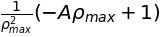

In [12]:
B_sol = sympy.solve(eq1, B)[0]
B_sol

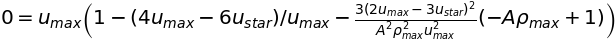

In [13]:
quadA = eq2.subs([(rho_star, rho_sol), (B, B_sol)])
quadA

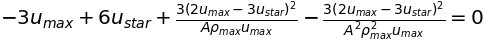

In [14]:
quadA.simplify()

In [15]:
A_sol = sympy.solve(quadA, A)

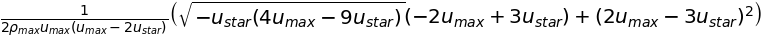

In [16]:
A_sol[0]

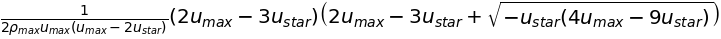

In [17]:
A_sol[1]

In [18]:
A_val_0 = A_sol[0].evalf(subs={u_star: 0.7, u_max: 1.0, rho_max: 10.0})
A_val_0

In [19]:
A_val_1 = A_sol[1].evalf(subs={u_star: 0.7, u_max: 1.0, rho_max: 10.0})
A_val_1

In [20]:
A_val = max(A_val_0, A_val_1)
A_val

In [21]:
B_val = B_sol.evalf(subs={rho_max: 10.0, A: A_val})
B_val

In [22]:
sympy.init_printing(use_latex=False)

In [23]:
print(type(rho_max), type(u_max))

<class 'sympy.core.symbol.Symbol'> <class 'sympy.core.symbol.Symbol'>


In [24]:
rho_max = 10.0
u_max = 1.0

In [25]:
def flux(rho, u_max, A, B):
    F = rho * u_max * (1.0 - A * rho - B * rho**2)
    return F

In [26]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [27]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [28]:
def rho_green_light(x, rho_light):
    rho = numpy.zeros_like(x)
    mask = numpy.where(x < 2.0)
    rho[mask] = rho_light * x[mask] / 2.0
    return rho

In [30]:
nx = 81  
L = 4.0  
dx = L / (nx - 1)  
nt = 30 
rho_light = 5.0 

x = numpy.linspace(0.0, L, num=nx)

rho0 = rho_green_light(x, rho_light)

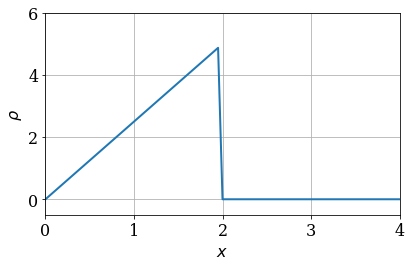

In [31]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 6.0)
pyplot.tight_layout();

In [32]:
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        # Compute the flux.
        F = flux(rho, *args)
        # Advance in time.
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        # Set the left boundary condition.
        rho[0] = bc_value
        # Record the time-step solution.
        rho_hist.append(rho.copy())
    return rho_hist

In [33]:
sigma = 1.0
dt = sigma * dx / u_max  

rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, A_val, B_val)

In [34]:
def update_plot(n, rho_hist):
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(rho_hist[n])